In [381]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 

In [382]:
cars = pd.read_csv('../data/ScrapedData/cars_cleaned.csv')
cars.shape

(5062, 13)

In [383]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5062 entries, 0 to 5061
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_make          5062 non-null   object 
 1   car_model         5050 non-null   object 
 2   model_year        5062 non-null   int64  
 3   km                5062 non-null   int64  
 4   transmission      5062 non-null   object 
 5   fuel              5062 non-null   object 
 6   color             5062 non-null   object 
 7   no_doors          635 non-null    float64
 8   engine_capacity   5062 non-null   float64
 9   drive_type        5062 non-null   object 
 10  no_cylinders      3174 non-null   float64
 11  Accident_history  5062 non-null   object 
 12  price             5062 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 514.2+ KB


In [384]:
cars.dropna(subset = ['car_model'], inplace=True)

In [385]:
cars.describe()

,model_year,km,no_doors,engine_capacity,no_cylinders,price
count,5050.000000,5.050000e+03,635.000000,5050.000000,3173.000000,5.050000e+03
mean,2014.514455,1.756333e+05,4.176378,2729.270491,5.458241,6.289525e+04
std,3.995825,1.370052e+05,0.589399,1218.058491,1.562054,7.207942e+04
min,1976.000000,0.000000e+00,2.000000,1.000000,3.000000,5.300000e+01
25%,2013.000000,9.200000e+04,4.000000,1800.000000,4.000000,2.400000e+04
50%,2015.000000,1.610000e+05,4.000000,2500.000000,6.000000,4.100000e+04
75%,2017.000000,2.420000e+05,4.000000,3000.000000,6.000000,7.200000e+04
max,2023.000000,4.300000e+06,5.000000,6400.000000,12.000000,1.111000e+06


# EDA 

#### 1- Distribution of data (Numerical Data)

/home/ysotaibi/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ysotaibi/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ysotaibi/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

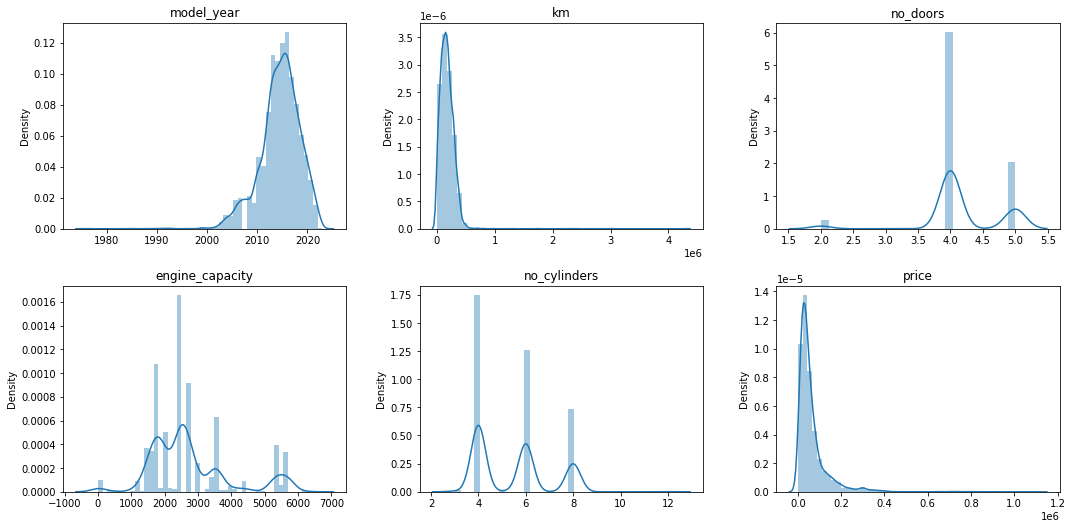

In [386]:
df_dist = cars.select_dtypes([int,float]) 
fig = plt.figure(figsize=(15, 18)) 
try:
    for i,columns in enumerate(df_dist.columns, 1): 
        ax = plt.subplot(5,3,i) 
        sns.distplot(x=df_dist[columns])
        ax.set_xlabel(None) 
        ax.set_title(f'{columns}')
        plt.tight_layout(w_pad=3) 
except ValueError as ve:
    exit;      
plt.show()

## Dealing with outlires 
#### model_year, km and price features are skewed either positively or negeativly, we have to elemenate outlires for each one of them.
#### Note: I'm dropping the extreme values because the have too many observations with few extreme values.

- model_year

In [387]:
# For model_year I will only include model_year > 2000 
 
cars = cars[~(cars['model_year'] <= 2006)] 
cars = cars[~(cars['model_year'] >= 2023)]  

- km

In [388]:
# how many values greater than 500k we have in km feature 

cars[(cars['km'] >= 400000)].count()

car_make            95
car_model           95
model_year          95
km                  95
transmission        95
fuel                95
color               95
no_doors            10
engine_capacity     95
drive_type          95
no_cylinders        42
Accident_history    95
price               95
dtype: int64

In [389]:
# Let's remove them 

cars = cars[~(cars['km'] >= 450000)]  

- price

In [390]:
# how many values greater than 200k we have in price feature
 
cars[(cars['price'] >= 250000)].count()

car_make            150
car_model           150
model_year          150
km                  150
transmission        150
fuel                150
color               150
no_doors             25
engine_capacity     150
drive_type          150
no_cylinders        137
Accident_history    150
price               150
dtype: int64

In [391]:
# Dropping them 
cars = cars[~(cars['price'] >= 200000)]  

- engine_capacity

In [392]:
cars = cars[~(cars['engine_capacity'] <= 1000)]  
cars = cars[~(cars['engine_capacity'] >= 6000)]  

- no_cylinders

In [393]:
cars = cars[~(cars['no_cylinders'] >= 12)] 

/home/ysotaibi/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ysotaibi/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ysotaibi/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

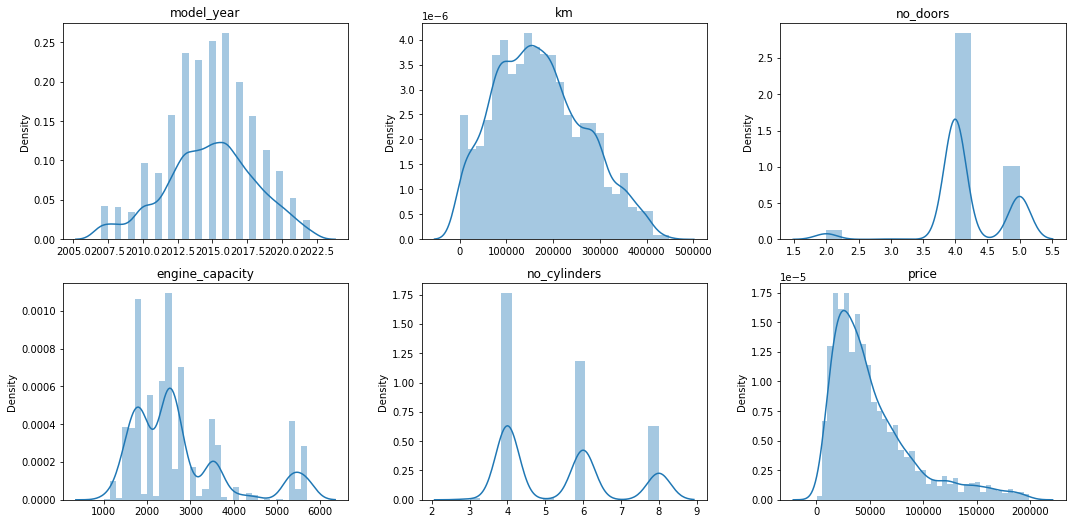

In [394]:
df_dist = cars.select_dtypes([int,float]) 
fig = plt.figure(figsize=(15, 18)) 
try:
    for i,columns in enumerate(df_dist.columns, 1): 
        ax = plt.subplot(5,3,i) 
        sns.distplot(x=df_dist[columns])
        ax.set_xlabel(None) 
        ax.set_title(f'{columns}')
        plt.tight_layout(w_pad=3) 
except ValueError as ve:
    exit;      
plt.show()

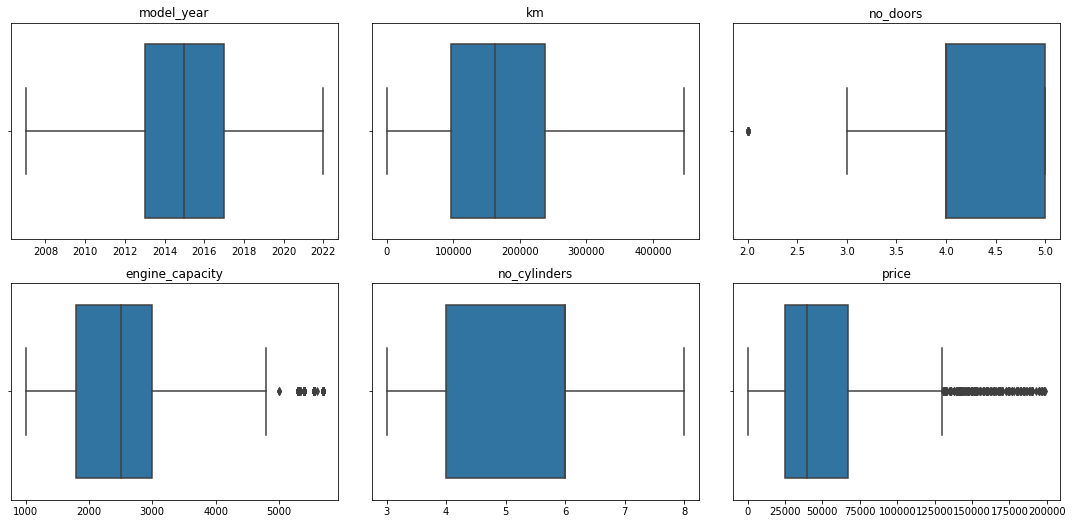

In [395]:
df_box = cars.select_dtypes([int,float]) 
fig = plt.figure(figsize=(15, 18)) 
try:
    for i,columns in enumerate(df_box.columns, 1): 
        ax = plt.subplot(5,3,i) 
        sns.boxplot(x=df_box[columns])
        ax.set_xlabel(None) 
        ax.set_title(f'{columns}')
        plt.tight_layout(w_pad=3) 
except ValueError as ve:
    exit;      
plt.show()

## Let's check for price outlires in each car_make

<AxesSubplot:xlabel='price', ylabel='car_make'>

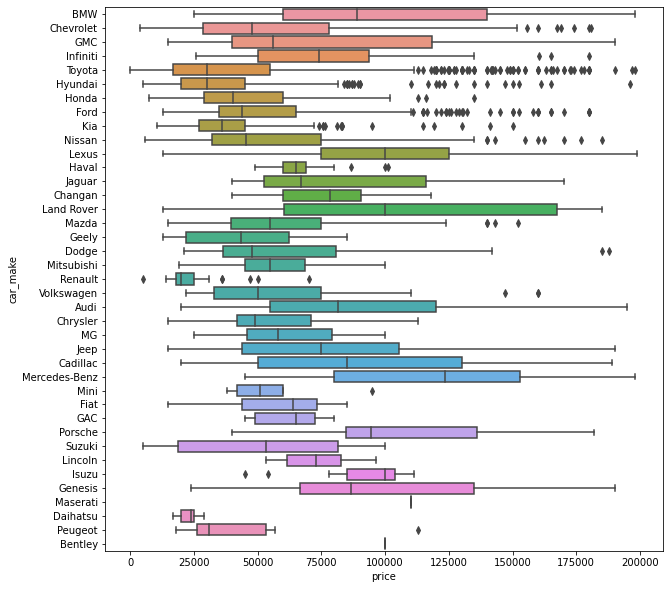

In [396]:
fig = plt.figure(figsize=(10, 10)) 
sns.boxplot(data=cars, y = 'car_make', x = 'price')
#plt.xticks(rotation=90)

<h1 style = 'color:red' >solved</h1>

#### After taking a quick glimpse at the excel sheet, I found that there's mistyped observations for the price feature, an example is Toyota (Yaris) with a price of 125k which is wrong. 


In [397]:
qs = cars.groupby("car_model")["price"].quantile([0,0.999])
qs = qs.unstack().reset_index()
qs.columns = ["car_model", "q1", "q3"]

cars = pd.merge(cars, qs, on="car_model", how="left")
cars

# Source code :
# https://stackoverflow.com/questions/48994157/get-the-number-of-outliers-by-group-in-pandas

,car_make,car_model,model_year,km,transmission,fuel,color,no_doors,engine_capacity,drive_type,no_cylinders,Accident_history,price,q1,q3
0,BMW,7,2018,34770,Automatic,Petrol,Silver,4.0,3000.000000,Rear Wheel Drive,4.0,Perfect inside out,190000,29000.0,198000.0
1,Chevrolet,Suburban,2018,36827,Automatic,Petrol,Black,5.0,5300.000000,Rear Wheel Drive,8.0,Perfect inside out,135575,27000.0,173925.0
2,Chevrolet,Silverado,2016,142731,Automatic,Petrol,White,2.0,5300.000000,All Wheel Drive,8.0,Perfect inside out,64450,26000.0,101712.0
3,GMC,Yukon,2018,79504,Automatic,Petrol,Gray,5.0,5328.000000,Rear Wheel Drive,8.0,Perfect inside out,145350,20000.0,190186.8
4,GMC,Yukon,2018,31506,Automatic,Petrol,Gray,5.0,5328.000000,Rear Wheel Drive,8.0,Perfect inside out,153400,20000.0,190186.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4459,Land Rover,Rover,2012,176000,Automatic,Petrol,Silver,NaN,4395.000000,Drive,8.0,Perfect inside out,90000,13000.0,184940.0
4460,Volkswagen,CC,2014,147000,Automatic,Petrol,Black,NaN,2729.270491,Drive,4.0,Perfect inside out,40000,22000.0,89804.0
4461,Fiat,500,2012,128000,Automatic,Petrol,White,NaN,2729.270491,Drive,4.0,Perfect inside out,28500,28500.0,84982.5
4462,Toyota,Land,2015,144000,Automatic,Petrol,White,NaN,5700.000000,Drive,4.0,Perfect inside out,90000,12000.0,197838.0


In [398]:
cars["Outlier"] = ~cars["price"].between(cars["q1"], cars["q3"])
cars

,car_make,car_model,model_year,km,transmission,fuel,color,no_doors,engine_capacity,drive_type,no_cylinders,Accident_history,price,q1,q3,Outlier
0,BMW,7,2018,34770,Automatic,Petrol,Silver,4.0,3000.000000,Rear Wheel Drive,4.0,Perfect inside out,190000,29000.0,198000.0,False
1,Chevrolet,Suburban,2018,36827,Automatic,Petrol,Black,5.0,5300.000000,Rear Wheel Drive,8.0,Perfect inside out,135575,27000.0,173925.0,False
2,Chevrolet,Silverado,2016,142731,Automatic,Petrol,White,2.0,5300.000000,All Wheel Drive,8.0,Perfect inside out,64450,26000.0,101712.0,False
3,GMC,Yukon,2018,79504,Automatic,Petrol,Gray,5.0,5328.000000,Rear Wheel Drive,8.0,Perfect inside out,145350,20000.0,190186.8,False
4,GMC,Yukon,2018,31506,Automatic,Petrol,Gray,5.0,5328.000000,Rear Wheel Drive,8.0,Perfect inside out,153400,20000.0,190186.8,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4459,Land Rover,Rover,2012,176000,Automatic,Petrol,Silver,NaN,4395.000000,Drive,8.0,Perfect inside out,90000,13000.0,184940.0,False
4460,Volkswagen,CC,2014,147000,Automatic,Petrol,Black,NaN,2729.270491,Drive,4.0,Perfect inside out,40000,22000.0,89804.0,False
4461,Fiat,500,2012,128000,Automatic,Petrol,White,NaN,2729.270491,Drive,4.0,Perfect inside out,28500,28500.0,84982.5,False
4462,Toyota,Land,2015,144000,Automatic,Petrol,White,NaN,5700.000000,Drive,4.0,Perfect inside out,90000,12000.0,197838.0,False


In [399]:
cars[(cars['Outlier'] == True)].count()

car_make            204
car_model           204
model_year          204
km                  204
transmission        204
fuel                204
color               204
no_doors             29
engine_capacity     204
drive_type          204
no_cylinders        183
Accident_history    204
price               204
q1                  204
q3                  204
Outlier             204
dtype: int64

# Examples of outlires that fall in the 0.999 range of quartile

In [400]:
cars[(cars['car_model'] == 'Yaris') & (cars['Outlier'] == True)]

,car_make,car_model,model_year,km,transmission,fuel,color,no_doors,engine_capacity,drive_type,no_cylinders,Accident_history,price,q1,q3,Outlier
4252,Toyota,Yaris,2012,220000,Automatic,Petrol,White,NaN,1496.0,Drive,NaN,Perfect inside out,125000,7000.0,118620.0,True


In [401]:
cars[(cars['car_model'] == 'Elantra') & (cars['Outlier'] == True)]

,car_make,car_model,model_year,km,transmission,fuel,color,no_doors,engine_capacity,drive_type,no_cylinders,Accident_history,price,q1,q3,Outlier
2202,Hyundai,Elantra,2012,14000,Automatic,Petrol,Silver,NaN,1800.0,Drive,NaN,Perfect inside out,196000,9000.0,184316.0,True


In [402]:
# Droping rows that have Outlier as True 
cars.drop(cars[cars['Outlier'] == True].index, inplace=True)

In [403]:
cars[(cars['Outlier'] == True)].count()

car_make            0
car_model           0
model_year          0
km                  0
transmission        0
fuel                0
color               0
no_doors            0
engine_capacity     0
drive_type          0
no_cylinders        0
Accident_history    0
price               0
q1                  0
q3                  0
Outlier             0
dtype: int64

In [404]:
cars.drop(columns=['q1','q3','Outlier'], inplace=True, axis=1)

In [405]:
cars.shape

(4260, 13)

## price with model_year

<AxesSubplot:xlabel='model_year', ylabel='price'>

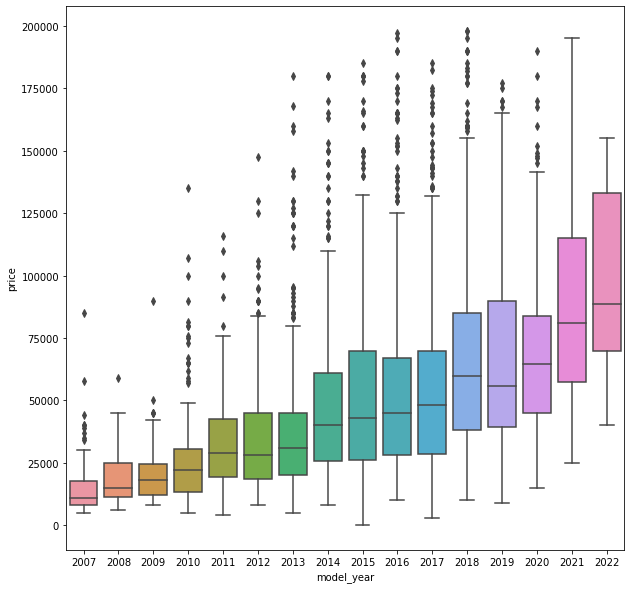

In [406]:
fig = plt.figure(figsize=(10, 10)) 
sns.boxplot(data=cars, x = 'model_year', y = 'price')

## price with no_cylinders

<AxesSubplot:xlabel='no_cylinders', ylabel='price'>

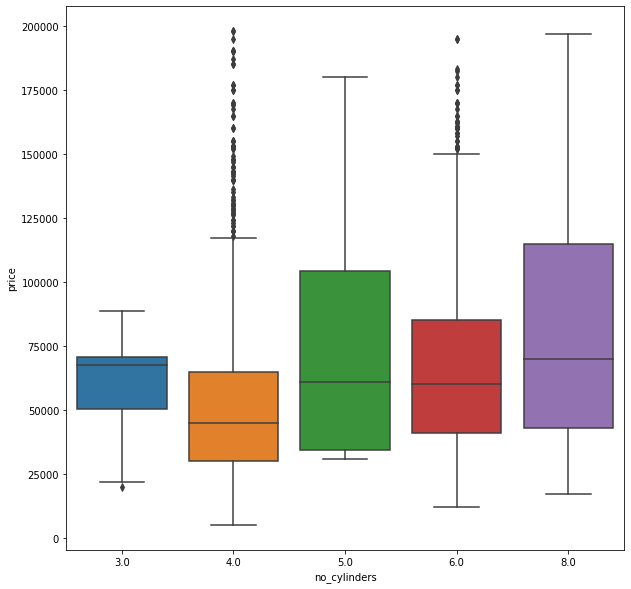

In [407]:
fig = plt.figure(figsize=(10, 10)) 
sns.boxplot(data=cars, x = 'no_cylinders', y = 'price')

### an explanation behind price outliers in V4 and V6 cars is that most of German cars (BMW, Audi, etc..) come in V4 and V6 engines and they are expensive in price. 

<AxesSubplot:xlabel='no_cylinders', ylabel='engine_capacity'>

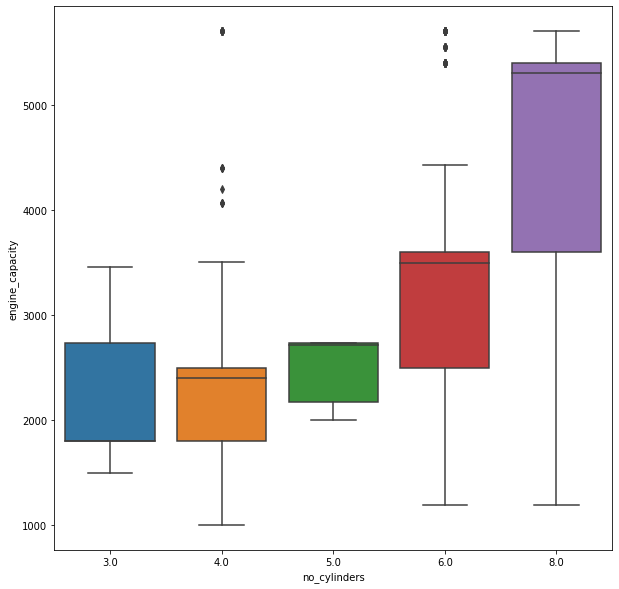

In [408]:
fig = plt.figure(figsize=(10, 10)) 
sns.boxplot(data=cars, x = 'no_cylinders', y = 'engine_capacity')

### It's known that engine capacity increases with more number of cylinders, engine size refers to the total volume of the cylinders in the engine.
- later on we will use KNN Imputer for no_cylinders and no_doors.

## Linearity of independetn features and the dependent target

<AxesSubplot:title={'center':'Price and engine_capacity'}, xlabel='engine_capacity', ylabel='price'>

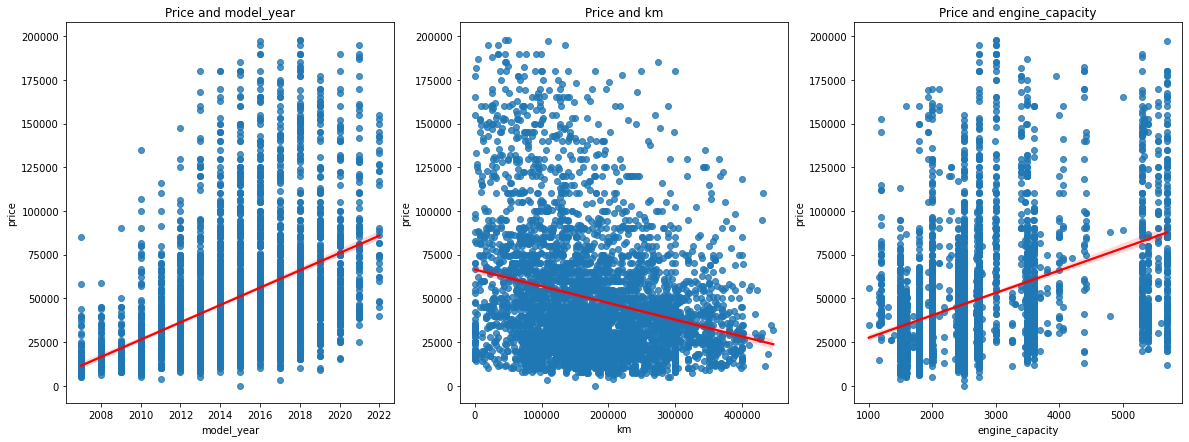

In [409]:
plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Price and model_year")
sns.regplot(x='model_year',y='price',data=cars, line_kws={"color": "red"})

plt.subplot(1,3,2)
plt.title("Price and km")
sns.regplot(x='km',y='price',data=cars, line_kws={"color": "red"})

plt.subplot(1,3,3)
plt.title("Price and engine_capacity")
sns.regplot(y='price',x='engine_capacity',data=cars, line_kws={"color": "red"})



In [410]:
#cars["price"] = np.log(cars["price"]) 
#cars["engine_capacity"] = np.log(cars["engine_capacity"]) 
#cars["km"] = np.log(cars["km"]) 

In [411]:
#sns.boxplot(data=cars, y = 'engine_capacity', x ='no_cylinders')

# Correlation 

<AxesSubplot:>

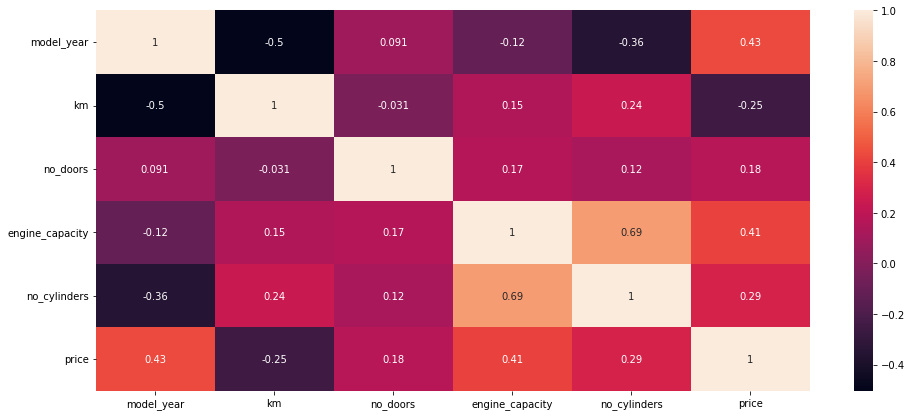

In [412]:
plt.figure(figsize=(16, 7))
sns.heatmap(cars.corr(), annot = True)

<h>Independent variables:</h>
- engine_capacity and no_cylinders have a moderate positive correlation 
- model_year and and km have a moderate negative correlation 

<h>Target variable with Independent variables:</h>

- price and model_year have a low positive correlation 
- price and engine_capacity have a low positive correlation

# Categorical Data

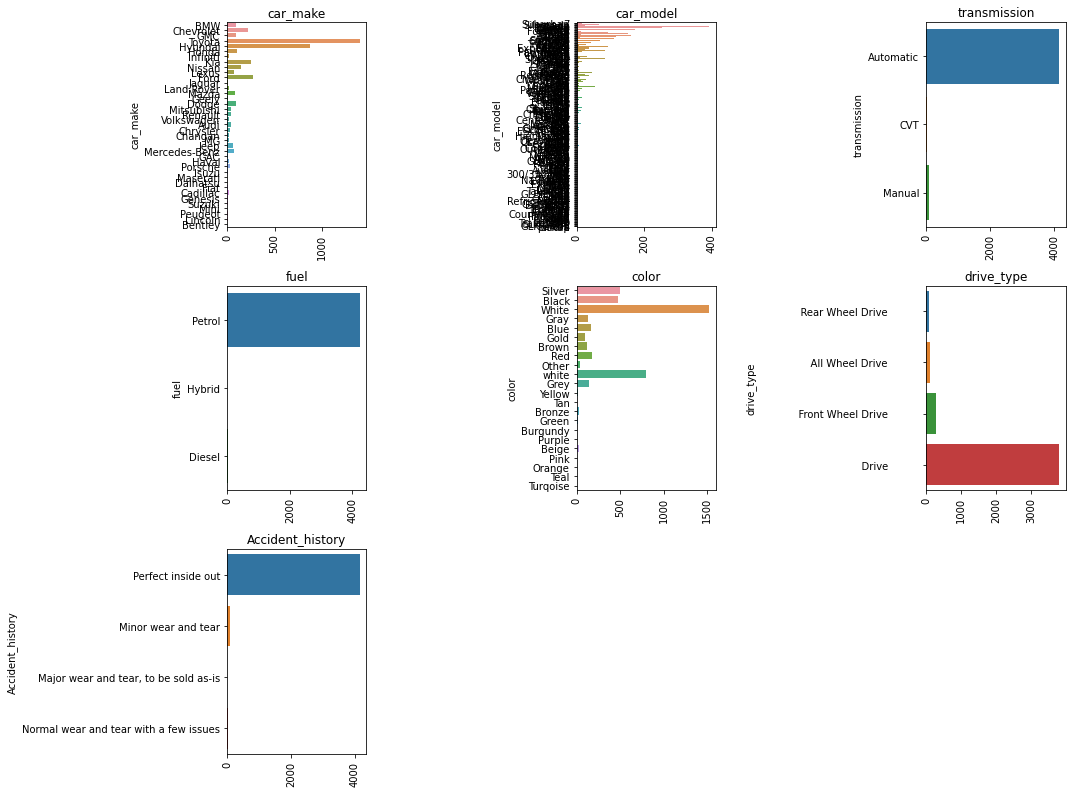

In [413]:
df_dist = cars.select_dtypes([object]) 
fig = plt.figure(figsize=(15, 18)) 
try:
    for i,columns in enumerate(df_dist.columns, 1): 
        ax = plt.subplot(5,3,i) 
        sns.countplot(y=df_dist[columns])
        ax.set_xlabel(None) 
        ax.set_title(f'{columns}')
        plt.xticks(rotation=90)
        plt.tight_layout(w_pad=3) 
except ValueError as ve:
    exit;      
plt.show()

#### drive_type feature has a mistyped observation 'drive' with a count more than 4000, It doesn't tell us anything about the drive type, so we might have to drop the entire column as it wouldn't help us much unless we knew the true value of the observation.

In [414]:
cars.drop(['drive_type'], axis = 1, inplace = True)

#### there's two feature values for color white on with upper case and one with lower, let's resolve it

In [415]:
cars['color'] = cars['color'].replace(['white'],['White'])

## Price and color 

<AxesSubplot:xlabel='price', ylabel='color'>

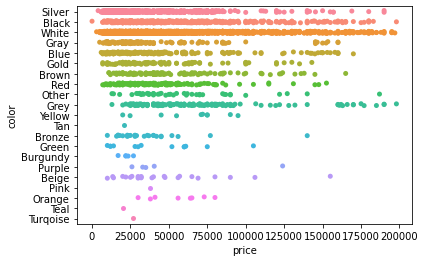

In [416]:
sns.stripplot(data = cars , x = 'price', y = 'color')

### Due to the dusty weather in KSA light colors are the most desirable espacially 'white', and that can result in an increased price for light color cars 

# KNN Imputer
- no_cylinders
- no_doors

In [417]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# First let's Encode categorical data 

In [418]:
cat_variables = cars[['car_make','car_model','transmission','fuel','color','Accident_history']]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
cat_dummies

,car_make_BMW,car_make_Bentley,car_make_Cadillac,car_make_Changan,car_make_Chevrolet,car_make_Chrysler,car_make_Daihatsu,car_make_Dodge,car_make_Fiat,car_make_Ford,...,color_Red,color_Silver,color_Tan,color_Teal,color_Turqoise,color_White,color_Yellow,Accident_history_Minor wear and tear,Accident_history_Normal wear and tear with a few issues,Accident_history_Perfect inside out
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4459,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4461,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4462,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [419]:
cars = cars.drop(['car_make','car_model','transmission','fuel','color','Accident_history'], axis=1)
cars = pd.concat([cars, cat_dummies], axis=1)
cars

,model_year,km,no_doors,engine_capacity,no_cylinders,price,car_make_BMW,car_make_Bentley,car_make_Cadillac,car_make_Changan,...,color_Red,color_Silver,color_Tan,color_Teal,color_Turqoise,color_White,color_Yellow,Accident_history_Minor wear and tear,Accident_history_Normal wear and tear with a few issues,Accident_history_Perfect inside out
0,2018,34770,4.0,3000.000000,4.0,190000,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,2018,36827,5.0,5300.000000,8.0,135575,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2016,142731,2.0,5300.000000,8.0,64450,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,2018,79504,5.0,5328.000000,8.0,145350,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2018,31506,5.0,5328.000000,8.0,153400,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4459,2012,176000,NaN,4395.000000,8.0,90000,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4460,2014,147000,NaN,2729.270491,4.0,40000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4461,2012,128000,NaN,2729.270491,4.0,28500,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4462,2015,144000,NaN,5700.000000,4.0,90000,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [420]:
imputer = KNNImputer(n_neighbors=3)
cars = pd.DataFrame(imputer.fit_transform(cars),columns = cars.columns)

In [421]:
cars

,model_year,km,no_doors,engine_capacity,no_cylinders,price,car_make_BMW,car_make_Bentley,car_make_Cadillac,car_make_Changan,...,color_Red,color_Silver,color_Tan,color_Teal,color_Turqoise,color_White,color_Yellow,Accident_history_Minor wear and tear,Accident_history_Normal wear and tear with a few issues,Accident_history_Perfect inside out
0,2018.0,34770.0,4.000000,3000.000000,4.0,190000.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2018.0,36827.0,5.000000,5300.000000,8.0,135575.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2016.0,142731.0,2.000000,5300.000000,8.0,64450.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2018.0,79504.0,5.000000,5328.000000,8.0,145350.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2018.0,31506.0,5.000000,5328.000000,8.0,153400.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4255,2012.0,176000.0,4.333333,4395.000000,8.0,90000.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4256,2014.0,147000.0,4.333333,2729.270491,4.0,40000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4257,2012.0,128000.0,3.333333,2729.270491,4.0,28500.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4258,2015.0,144000.0,3.333333,5700.000000,4.0,90000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [422]:
for i in cars.columns:
    try:
        cars[[i]] = cars[[i]].astype(int)
    except:
        pass

In [423]:
cars

,model_year,km,no_doors,engine_capacity,no_cylinders,price,car_make_BMW,car_make_Bentley,car_make_Cadillac,car_make_Changan,...,color_Red,color_Silver,color_Tan,color_Teal,color_Turqoise,color_White,color_Yellow,Accident_history_Minor wear and tear,Accident_history_Normal wear and tear with a few issues,Accident_history_Perfect inside out
0,2018,34770,4,3000,4,190000,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,2018,36827,5,5300,8,135575,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2016,142731,2,5300,8,64450,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,2018,79504,5,5328,8,145350,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2018,31506,5,5328,8,153400,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4255,2012,176000,4,4395,8,90000,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4256,2014,147000,4,2729,4,40000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4257,2012,128000,3,2729,4,28500,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4258,2015,144000,3,5700,4,90000,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [424]:
cars.isna().sum().sum()

0

# Model Building

In [425]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn import metrics

In [426]:
carslrm = cars

In [427]:
carslrm

,model_year,km,no_doors,engine_capacity,no_cylinders,price,car_make_BMW,car_make_Bentley,car_make_Cadillac,car_make_Changan,...,color_Red,color_Silver,color_Tan,color_Teal,color_Turqoise,color_White,color_Yellow,Accident_history_Minor wear and tear,Accident_history_Normal wear and tear with a few issues,Accident_history_Perfect inside out
0,2018,34770,4,3000,4,190000,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,2018,36827,5,5300,8,135575,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2016,142731,2,5300,8,64450,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,2018,79504,5,5328,8,145350,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2018,31506,5,5328,8,153400,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4255,2012,176000,4,4395,8,90000,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4256,2014,147000,4,2729,4,40000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4257,2012,128000,3,2729,4,28500,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4258,2015,144000,3,5700,4,90000,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [428]:
X = carslrm.drop(['price'], axis=1)
Y = carslrm['price']

In [350]:
sc = StandardScaler()
sc.fit(X[['model_year','km','no_doors','engine_capacity','no_cylinders']])

StandardScaler()

In [351]:
X_Scaled = sc.transform(X[['model_year','km','no_doors','engine_capacity','no_cylinders']])
scaled_data = pd.DataFrame(X[['model_year','km','no_doors','engine_capacity','no_cylinders']])

In [429]:
X_train, X_test, Y_train, Y_test = train_test_split(X , Y, test_size=0.3, random_state=123)

## Linear Regression

In [430]:
lrm = LinearRegression()

# Training the model
lrm.fit(X_train, Y_train)

# Prediction "testing"
y_pred_lrm = lrm.predict(X_test)

# Model Aucraccy using R2
error_score = metrics.r2_score(Y_test, y_pred_lrm)
print("R2 Score: " ,error_score)

R2 Score:  0.6667379907521371


## Random Forest Regressor

In [431]:
rf = RandomForestRegressor()

# Training the model
rf.fit(X_train,Y_train)

# Prediction "testing"
y_pred_rf = rf.predict(X_test)


error_score = metrics.r2_score(Y_test,y_pred_rf)
print("R2 Score: " ,error_score)


R2 Score:  0.7606966154041718


## Gradient Boosting Regressor

In [432]:
gbt = GradientBoostingRegressor()

# Training the model
gbt.fit(X_train,Y_train)

# Prediction "testing"
y_pred_gbt = gbt.predict(X_test)

# Model Aucraccy using R2
r_squared = metrics.r2_score(Y_test,y_pred_gbt)
print("R_squared :",r_squared)


R_squared : 0.7399845861058567


## XGBRegressor

In [439]:
xgb = XGBRegressor(max_depth=5, n_estimators=100)

# Training the model
xgb.fit(X_train,Y_train)

# Prediction "testing"
y_pred_xgb = xgb.predict(X_test)

# Model Aucraccy using R2
r_squared = metrics.r2_score(Y_test,y_pred_xgb)
print("R_squared :",r_squared)

R_squared : 0.7827658120802803


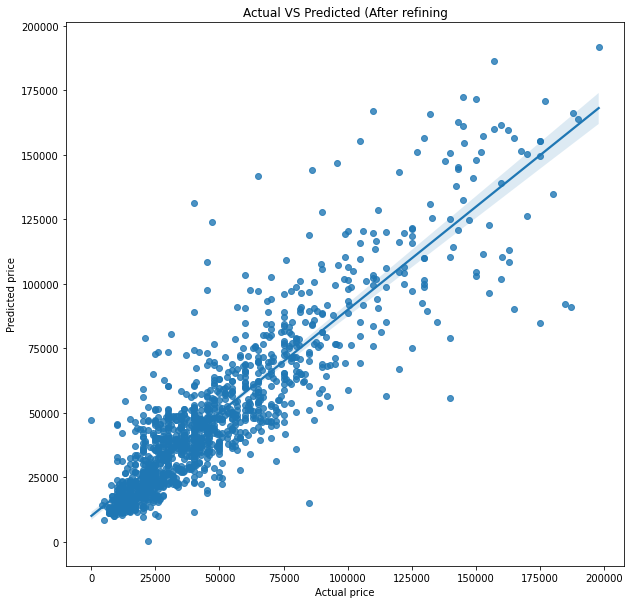

In [440]:
fig, ax = plt.subplots(figsize=(10, 10))



sns.regplot(x=Y_test, y = y_pred_xgb)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual VS Predicted (After refining")
plt.show()